In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
!pip install biopandas
from biopandas.mol2 import PandasMol2

     |████████████████████████████████| 266kB 7.8MB/s 


In [3]:
# Load molecular data
pmol = PandasMol2().read_mol2('/content/drive/My Drive/Molecular Simulation Data/flavanone/Copy of traj4_file.mol2')

#pmol = PandasMol2().read_mol2('X:\flavanone traj1\Copy of traj1_file.mol2')

# Display data
from IPython.display import display, HTML
print ("All atoms in the data:")
display(HTML(pmol.df.to_html()))

#print('Molecule ID: %s' % pmol.code)
#print('\nRaw MOL2 file contents:\n\n%s\n...' % pmol.mol2_text[:1000])
#pmol.df.head(10)

All atoms in the data:


,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,C1,6.2637,3.6838,26.5298,cb,1,CSP,-0.2524
1,2,C2,5.4257,4.3183,25.4333,cb,1,CSP,0.0178
2,3,C3,6.0125,5.6921,24.9703,cb,1,CSP,-0.0128
3,4,C4,7.0391,6.2653,25.9376,cb,1,CSP,0.0864
4,5,O5,6.4703,6.0099,27.2759,ob,1,CSP,-0.2548
5,6,C6,6.6373,4.6357,27.7601,cb,1,CSP,0.0352
6,7,C7,8.0889,4.5884,28.3073,c3,1,CSP,-0.0122
7,8,O8,8.0334,5.5722,29.4282,os,1,CSP,-0.4082
8,9,C9,7.6086,5.0597,30.5653,c,1,CSP,0.7524
9,10,O10,7.1052,3.9455,30.7269,o,1,CSP,-0.5146


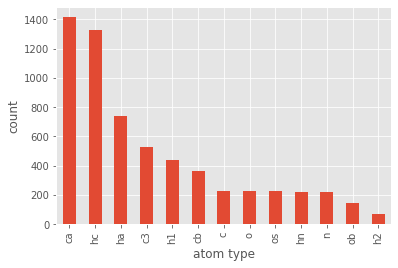

In [4]:
# Plot atoms count 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
pmol.df['atom_type'].value_counts().plot(kind='bar')
plt.xlabel('atom type')
plt.ylabel('count')
plt.show()

In [5]:
# Separate hydrogen atoms from the data

import pandas as pd
h1_atom = pmol.df[pmol.df['atom_type'] == 'h1']
ha_atom = pmol.df[pmol.df['atom_type'] == 'ha']
hc_atom = pmol.df[pmol.df['atom_type'] == 'hc']
hn_atom = pmol.df[pmol.df['atom_type'] == 'hn']
h2_atom = pmol.df[pmol.df['atom_type'] == 'h2']

# Display all hydrogen atoms present in the data
all_hydrogen_atom = pd.concat ([h1_atom,ha_atom,hc_atom,hn_atom,h2_atom],ignore_index=True, sort=False).sort_index()

print ("All Hydrogen atoms in the data:")
#display(HTML(all_hydrogen_atom.to_html()))


All Hydrogen atoms in the data:


In [6]:
# Separate all oxygen and nitrogen atoms from the data

os_atom = pmol.df[pmol.df['atom_type'] == 'os']
o_atom = pmol.df[pmol.df['atom_type'] == 'o']
ob_atom = pmol.df[pmol.df['atom_type'] == 'ob']
n_atom= pmol.df[pmol.df['atom_type'] == 'n']
nc_atom= pmol.df[pmol.df['atom_type'] == 'nc']
na_atom= pmol.df[pmol.df['atom_type'] == 'na']
nd_atom= pmol.df[pmol.df['atom_type'] == 'nd']

# Display all oxygen and nitrogen atoms present in the data
all_oxy_nitro_atom = pd.concat ([os_atom,o_atom,ob_atom,n_atom,na_atom,nc_atom,nd_atom],ignore_index=True, sort=False).sort_index()
print ("All Oxygen & Nitrogen Atoms in the molecules:")
#display(HTML(all_oxy_nitro_atom.to_html()))

All Oxygen & Nitrogen Atoms in the molecules:


In [7]:
# Calculate the hydrogen atoms coordinates
hydrogen_atom_coords=all_hydrogen_atom.loc[:,['x', 'y', 'z']].values

# Calculate the oxygen and nitrogen atoms coordinates
all_oxy_nitro_coord=all_oxy_nitro_atom.loc[:,['x', 'y', 'z']].values

from scipy.spatial import distance
# Calculate the distances between hydrogen and oxy/nitro atoms
oh_dist = distance.cdist(hydrogen_atom_coords, all_oxy_nitro_coord, 'euclidean')


In [8]:
# Calculate the O-H bond within 1.5A distance

import numpy as np
location_oh = np.where(oh_dist <= 1.5)

#list_oh= list(zip(location_oh[0], location_oh[1]))
#print("Atoms within 1.5A distance\n", location_oh)

In [9]:
bonded_h_atoms = pd.DataFrame(data = all_hydrogen_atom, index = location_oh[0]).sort_index()
print ("Hydrogen Atoms participated in OH bond:")
#display(HTML(bonded_h_atoms.to_html()))

Hydrogen Atoms participated in OH bond:


In [10]:
bonded_o_atoms = pd.DataFrame(data = all_oxy_nitro_atom, index = location_oh[1]).sort_index()
#print ("Oxygen Atoms participated in OH bond:")
#display(HTML(bonded_o_atoms.to_html()))

In [11]:
# Calculate drug covalent OH bond as donors

drug_h = bonded_h_atoms[bonded_h_atoms['subst_id']>4]
drug_o = bonded_o_atoms[bonded_o_atoms['subst_id']>4]
#print ("Drug Oxygen Atoms from OH bond:")
#display(HTML(drug_oh.to_html()))

In [12]:
# Calculate Acceptors from polymer to create H bond

# Separate os, o and n atoms from the polymer
polymer_atoms = pmol.df[pmol.df['subst_name'] == 'CSP']

os_polymer = polymer_atoms[polymer_atoms['atom_type'] == 'os']
o_polymer  = polymer_atoms[polymer_atoms['atom_type'] == 'o']
n_polymer = polymer_atoms[polymer_atoms['atom_type'] == 'n']

# Display oxygen and nitrogen atoms from polymer to create H bond
polymer_oxy_nitro_atom = pd.concat ([os_polymer,o_polymer,n_polymer],ignore_index=True, sort=False).sort_index()
#print ("oxygen and nitrogen atoms from polymer to create H bond: ")
#display(HTML(polymer_oxy_nitro_atom.to_html()))

In [13]:
# Hydrogen bond calculation

# Calculate the hydrogen atoms coordinates
drug_h_coords = drug_h.loc[:,['x', 'y', 'z']].values

# Calculate the oxygen atoms coordinates
drug_o_coords = drug_o.loc[:,['x', 'y', 'z']].values

# Calculate the oxygen and nitrogen atoms coordinates
polymer_oxy_nitro_atom_coord = polymer_oxy_nitro_atom.loc[:,['x', 'y', 'z']].values

# Calculate the distances between hydrogen and oxy/nitro atoms
dist_combination1 = distance.cdist(drug_h_coords, polymer_oxy_nitro_atom_coord, 'euclidean')
print ("Distance", dist_combination1 )
# Calculate the Hydrogen bond within 3.5A distance
location_H_bond = np.where(dist_combination1 <= 3.5)

print (location_H_bond)

Distance []
(array([], dtype=int64), array([], dtype=int64))


In [14]:
# Angle Calculation

#ba = drug_o_coords - drug_h_coords
#bc = polymer_oxy_nitro_atom_coord - drug_h_coords

#cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
#angle = np.arccos(cosine_angle)

#print (np.degrees(angle))

#hydrogen_bonded_h_atoms = pd.DataFrame(data = drug_oh, index = location_H_bond[0])
#print ("Hydrogen Atoms participated in Hydrogen bond:")
#display(HTML(hydrogen_bonded_o_atoms.to_html()))

#hydrogen_bonded_acceptors = pd.DataFrame(data = polymer_oxy_nitro_atom, index = location_H_bond[1]).sort_index()
#print ("Acceptors participated in Hydrogen bond:")
#display(HTML(hydrogen_bonded_acceptors.to_html()))

In [15]:
# Calculate Acceptors from drug to create H bond

# Separate os, o and n atoms from drug

drug_atoms = pmol.df[pmol.df['subst_id'] > 4]

os_drug = drug_atoms[drug_atoms['atom_type'] == 'os']
o_drug  = drug_atoms[drug_atoms['atom_type'] == 'o']
n_drug = drug_atoms[drug_atoms['atom_type'] == 'n']

# Display oxygen and nitrogen atoms from polymer to create H bond
drug_oxy_nitro_atom = pd.concat ([os_drug,o_drug,n_drug],ignore_index=True, sort=False).sort_index()
#print ("oxygen and nitrogen atoms from drug to create H bond: ")
#display(HTML(drug_oxy_nitro_atom.to_html()))

In [16]:
# Calculate polymer covalent OH bond as donors

polymer_oh = bonded_h_atoms[bonded_h_atoms['subst_name'] == 'CSP']
#print ("Polymer Oxygen Atoms from OH bond:")
#display(HTML(polymer_oh.to_html()))

In [17]:
# Hydrogen bond calculation

# Calculate the hydrogen atoms coordinates
polymer_oh_coords = polymer_oh.loc[:,['x', 'y', 'z']].values

# Calculate the oxygen and nitrogen atoms coordinates
drug_oxy_nitro_atom_coord = drug_oxy_nitro_atom.loc[:,['x', 'y', 'z']].values

# Calculate the distances between hydrogen and oxy/nitro atoms
dist_combination2 = distance.cdist(polymer_oh_coords, drug_oxy_nitro_atom_coord, 'euclidean')

# Calculate the Hydrogen bond within 3.5A distance
location_H_bond = np.where(dist_combination1 <= 3.5)

print (location_H_bond)

(array([], dtype=int64), array([], dtype=int64))


In [18]:
# Calculate hn Donors from polymer to create H bond

hn_polymer = polymer_atoms[polymer_atoms['atom_type'] == 'hn']

#print ("hn atoms from polymer as donors: ")
#display(HTML(hn_polymer.to_html()))

In [19]:
# Hydrogen bond calculation

# Calculate the oxygen and nitrogen atoms coordinates
hn_polymer_coord = hn_polymer.loc[:,['x', 'y', 'z']].values

# Calculate the distances between hydrogen and oxy/nitro atoms
dist_combination3 = distance.cdist(drug_h_coords, hn_polymer_coord, 'euclidean')

# Calculate the Hydrogen bond within 3.5A distance
location_H_bond = np.where(dist_combination1 <= 3.5)

print (location_H_bond)

(array([], dtype=int64), array([], dtype=int64))


In [20]:
#print('x, y, z coords:', hydrogen_coord.values[0])
#distances = pmol.distance(hydrogen_coord.values[0])
#print(distances)
#pmol.df['distances'] = distances
#pmol.df.head()
#all_within_3A = pmol.df[pmol.df['distances'] <= 3]
#print("Atoms within 3A distance\n", all_within_3A)
#all_within_3A.tail()